
## Задача проекта: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Цель: провести разведывательный анализ данных и выделить параметры для будущей модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

In [431]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 7)

#pd.options.mode.chained_assignment = None

from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [432]:
# для удобства анализа создадим датафрейм с описаниями переменных
# для переменнной studytime, granular нет описания, так что ее не включаем
description = ['аббревиатура школы, в которой учится ученик',
'пол ученика ('F' - женский, "M" - мужской)',
'возраст ученика (от 15 до 22)',
'тип адреса ученика ("U" - городской, "R" - за городом)',
'размер семьи("LE3" <= 3, "GT3" >3)',
'статус совместного жилья родителей ("T" - живут вместе "A" - раздельно)',
'образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)',
'образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)',
'работа матери ("teacher" - учитель, "health" - сфера здравоохранения, "services" - гос служба, "at_home" - не работает, "other" - другое)',
'работа отца ("teacher" - учитель, "health" - сфера здравоохранения, "services" - гос служба, "at_home" - не работает, "other" - другое)',
'причина выбора школы ("home" - близость к дому, "reputation" - репутация школы, "course" - образовательная программа, "other" - другое)',
'опекун ("mother" - мать, "father" - отец, "other" - другое)',
'время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)',
'время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)',
'количество внеучебных неудач (n, если 1<=n<=3, иначе 0)',
'дополнительная образовательная поддержка (yes или no)',
'семейная образовательная поддержка (yes или no)',
'дополнительные платные занятия по математике (yes или no)',
'дополнительные внеучебные занятия (yes или no)',
'посещал детский сад (yes или no)',
'хочет получить высшее образование (yes или no)',
'наличие интернета дома (yes или no)',
'в романтических отношениях (yes или no)',
'семейные отношения (от 1 - очень плохо до 5 - очень хорошо)',
'свободное время после школы (от 1 - очень мало до 5 - очень мого)',
'проведение времени с друзьями (от 1 - очень мало до 5 - очень много)',
'текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)',
'количество пропущенных занятий',
'баллы по госэкзамену по математике']

col_df = pd.DataFrame(description, index = df.columns[df.columns != 'studytime, granular'])

In [433]:
df.head(10) # посмотрим на датасет

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Сразу видим, что есть количественные и номинальные признаки. Есть пропуски. 


In [435]:
# создадим списки количественных и номинальных переменных 
object_columns = []
numeric_columns = []

for x in list(df.columns):
    if df[x].dtype == 'float64' or df[x].dtype == 'int64':
        numeric_columns.append(x)
    else:
        object_columns.append(x)

In [436]:
# оценим количество пропусков по количеству и в процентах
for col in df.columns:
    pct_missing = round(df[col].isna().mean()*100)
    print('{} - {} - {}%'.format(col, df[col].isna().sum(), pct_missing))

school - 0 - 0.0%
sex - 0 - 0.0%
age - 0 - 0.0%
address - 17 - 4.0%
famsize - 27 - 7.0%
Pstatus - 45 - 11.0%
Medu - 3 - 1.0%
Fedu - 24 - 6.0%
Mjob - 19 - 5.0%
Fjob - 36 - 9.0%
reason - 17 - 4.0%
guardian - 31 - 8.0%
traveltime - 28 - 7.0%
studytime - 7 - 2.0%
failures - 22 - 6.0%
schoolsup - 9 - 2.0%
famsup - 39 - 10.0%
paid - 40 - 10.0%
activities - 14 - 4.0%
nursery - 16 - 4.0%
studytime, granular - 7 - 2.0%
higher - 20 - 5.0%
internet - 34 - 9.0%
romantic - 31 - 8.0%
famrel - 27 - 7.0%
freetime - 11 - 3.0%
goout - 8 - 2.0%
health - 15 - 4.0%
absences - 12 - 3.0%
score - 6 - 2.0%


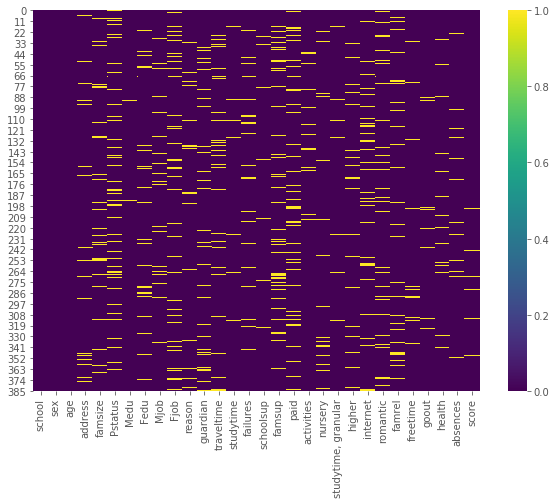

In [437]:
# Визуализируем количество пропусков
cols = df.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap= 'viridis')    

In [438]:
# посчитаем количество строчек без пропусков 
df.dropna().shape[0]

97

По каждому признаку пропусков относительно немного (максимум 11%). Но пропуски так "равномерно" распределены по признакам, что полностью непустых строк только 97. Если выбросить все строчки с отсутствующими значениями, это уменьшит датасет в 4 раза. Следовательно, будем заполнять.

Однако все-таки строки с пропусками в переменной score (итоговый балл по математике) я предлагаю убрать из датасета. Пропусков в этом столбце немного (6), при этом для нас все-таки важно точно знать полученный балл при построении модели. 

In [439]:
# уберем из датафрейма все строки, в которых итоговый балл по математике неизвестен
df = df[df.score.isna() == False]

# Анализ количественных признаков. 

(13.0, 0.0)

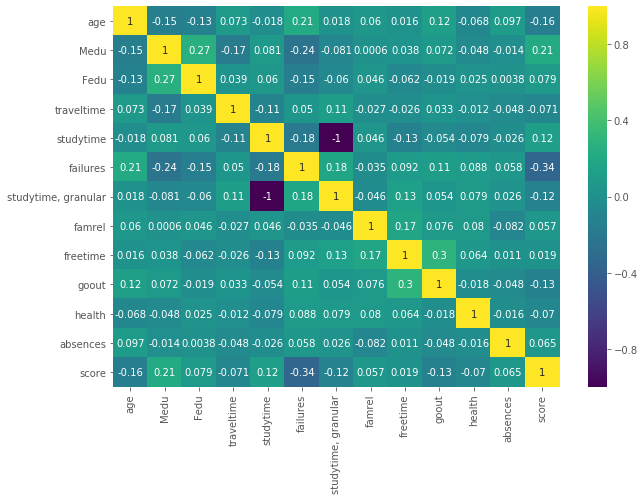

In [440]:
# Оценим корреляцию переменных до заполнения пропусков и удаления выбросов
ax = sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Видим 100% отрицательную (обратную) корреляцию переменных studytime (время на учебу помимо школы) и studytime, granular (значение не поясняется в описании датасета). Следовательно, можно считать вторую перемеменную избыточной и удалить ее из датасета. 

Других значимых корреляций (хотя бы более 0.6) не видим. 

In [441]:
df.drop(['studytime, granular'], inplace = True, axis = 1)

Рассмотрим количественные переменные по отдельности. 


In [442]:
def get_stats(col):
    ''' Функция для вывода описательной статистики и графиков по количественным переменным'''
    
    mean = round(df[col].mean(),2)
    median = df[col].median()
    std = round(df[col].std(),2)
    missing = df[col].isna().sum()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print('--- Статистика по переменной: {} ---'.format(col), '\n\n', col_df.loc[col][0], '\n\nСреднее: {}'.format(mean), 
          '\nМедиана: {}'.format(median), 
          '\nСтандартное отклонение: {}'.format(std), '\n25-й перцентиль: {},'.format(perc25), 
          '75-й перцентиль: {},'.format(perc75),
           "\nIQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR),
         'Размах: [{f}, {l}]'.format(f=df[col].min(), l=df[col].max()), 
         '\n\nПропущенных значений: {}'.format(df[col].isna().sum()))
    print('Принимает значения:\n', df[col].value_counts())
    plt.figure(figsize=(8,5))
    plt.hist(df[col], bins = df[col].nunique())
    #sns.distplot(df[col], bins = df[col].nunique())

--- Статистика по переменной: age --- 

 возраст ученика (от 15 до 22) 

Среднее: 16.67 
Медиана: 17.0 
Стандартное отклонение: 1.27 
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, 
IQR: 2.0,  Границы выбросов: [13.0, 21.0]. Размах: [15, 22] 

Пропущенных значений: 0
Принимает значения:
 16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64


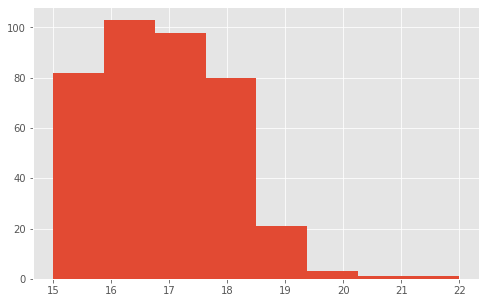

In [443]:
get_stats(numeric_columns[0])

Значение 22 с точки зрения статистики попадает в выбросы, однако в описании переменной уточняется, что она может принимать такое значение, поэтому предлагаю не выбрасывать. 

<Figure size 576x360 with 0 Axes>

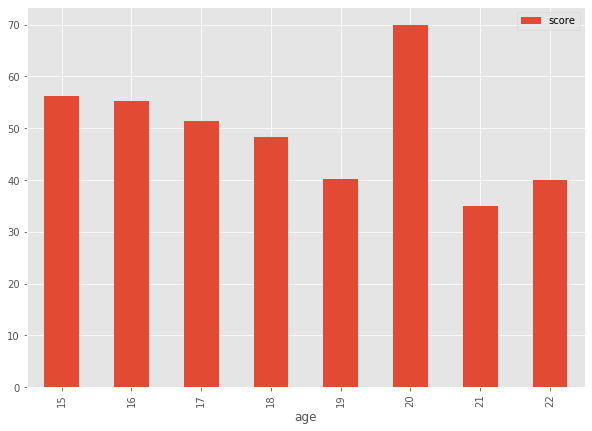

In [444]:
# Итересная тенденция - с возрастом средний балл снижается (в 20 лет какой-то нетипичный подъем)
plt.figure(figsize=(8,5))
df.pivot_table(values = ['score'], 
               index = 'age', 
               aggfunc = 'mean').plot(kind = 'bar')

--- Статистика по переменной: Medu --- 

 образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 

Среднее: 2.77 
Медиана: 3.0 
Стандартное отклонение: 1.09 
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, 
IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. Размах: [0.0, 4.0] 

Пропущенных значений: 3
Принимает значения:
 4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64


C:\Users\victo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\victo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


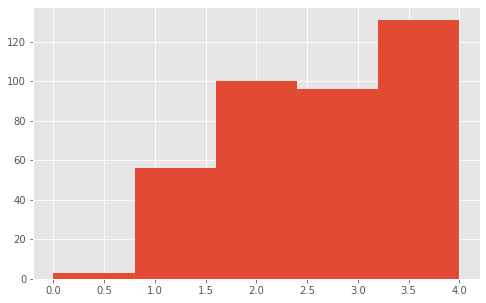

In [445]:
get_stats(numeric_columns[1])

Выбросов нет, однако я предлагаю все значения "0" (всего 3 случая) перекодировать в "1". Тем более, что шкала ранговая. Для взрослого человека начальная школа и отсутствие образования - это практически одно и то же, поэтому эти категории ответов можно объединить, присвоив им общий ранг - 1. 

Пропущенные значения заменяем медианой. 

In [446]:
df.Medu.replace(0,1, inplace = True)

In [447]:
df['Medu'].fillna(df['Medu'].median(), inplace=True)

--- Статистика по переменной: Fedu --- 

 образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 

Среднее: 2.63 
Медиана: 3.0 
Стандартное отклонение: 2.24 
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, 
IQR: 1.0,  Границы выбросов: [0.5, 4.5]. Размах: [0.0, 40.0] 

Пропущенных значений: 24
Принимает значения:
 2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64


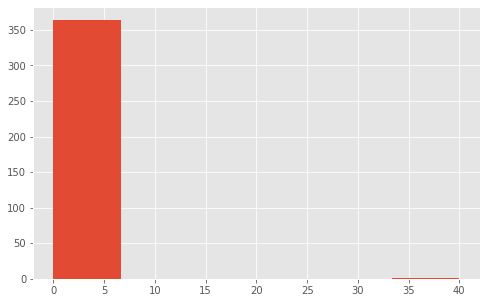

In [448]:
get_stats(numeric_columns[2])

Видим выброс - значение 40. Можно предположить, что это результат ошибки при вводе данных и заменить на наиболее вероятное значение - 4. 

In [449]:
df.Fedu.replace(40,4, inplace = True)

--- Статистика по переменной: Fedu --- 

 образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 

Среднее: 2.53 
Медиана: 3.0 
Стандартное отклонение: 1.09 
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, 
IQR: 1.0,  Границы выбросов: [0.5, 4.5]. Размах: [0.0, 4.0] 

Пропущенных значений: 24
Принимает значения:
 2.0    105
3.0     94
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64


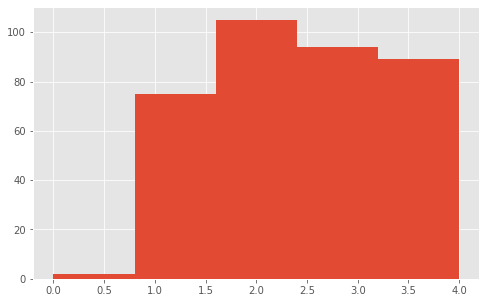

In [450]:
# Посмотрим еще раз статистику после удаления выброса
get_stats(numeric_columns[2])

С точки зрения статистики значение "0" - это выброс, однако я предлагаю объединить колонки со значениями "0" и "1", пользуясь той же логикой, что и с переменной Medu(образование матери). Пропущенные значения заменим на медиану. 

In [451]:
df['Fedu'].replace(0,1, inplace=True)

In [452]:
df['Fedu'].fillna(value=df['Fedu'].median(), inplace=True)

--- Статистика по переменной: traveltime --- 

 время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) 

Среднее: 1.43 
Медиана: 1.0 
Стандартное отклонение: 0.69 
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, 
IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. Размах: [1.0, 4.0] 

Пропущенных значений: 28
Принимает значения:
 1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64


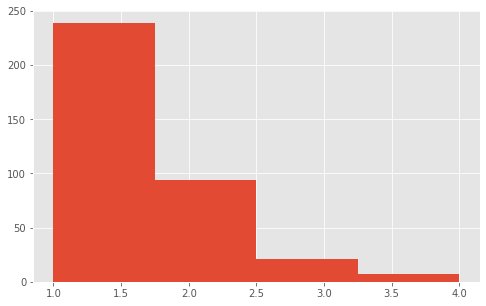

In [453]:
get_stats(numeric_columns[3])

Предполагаю, что ученики, живущие за городом, как правило, добираются до школы дольше. 

In [454]:
df.groupby('address').traveltime.median()

address
R    2.0
U    1.0
Name: traveltime, dtype: float64

Заполним пропуски в зависимости от того, живет ученик в городе или за городом, в случае отсутствия значений по адресу - заменяем просто медианой.

In [455]:
traveltime_r = df[df.address =='R'].traveltime.median()
traveltime_u = df[df.address =='U'].traveltime.median()

In [456]:
def fill_traveltime(row):
    if pd.isnull(row.traveltime):
        if row.address == 'R':
            return traveltime_r
        if row.address == 'U':
            return traveltime_u
        return df.traveltime.median()
    return row.traveltime

In [457]:
df.traveltime = df.apply(fill_traveltime, axis = 1)

Выбросы (7 человек добираются до школы более часа) предлагаю объединить с ближайшим значением = "3". Тогда оно будет присвоено всем детям, которые добираются до школы более получаса. 

In [458]:
df.traveltime.replace(4,3, inplace = True)

--- Статистика по переменной: studytime --- 

 время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) 

Среднее: 2.04 
Медиана: 2.0 
Стандартное отклонение: 0.85 
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, 
IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. Размах: [1.0, 4.0] 

Пропущенных значений: 7
Принимает значения:
 2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64


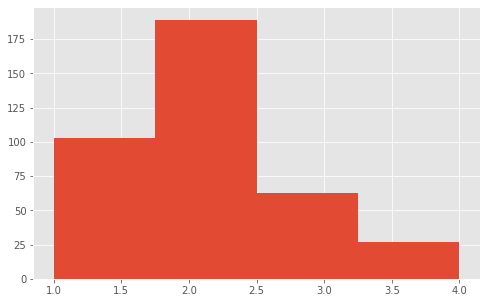

In [459]:
get_stats(numeric_columns[4])

Выбросы есть, но их довольно много, так что предлагаю их не удалять. Пропущенные значения заменяем на медиану.

In [460]:
df.studytime.fillna(value=df.studytime.median(), inplace=True)

--- Статистика по переменной: failures --- 

 количество внеучебных неудач (n, если 1<=n<=3, иначе 0) 

Среднее: 0.33 
Медиана: 0.0 
Стандартное отклонение: 0.73 
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, 
IQR: 0.0,  Границы выбросов: [0.0, 0.0]. Размах: [0.0, 3.0] 

Пропущенных значений: 22
Принимает значения:
 0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64


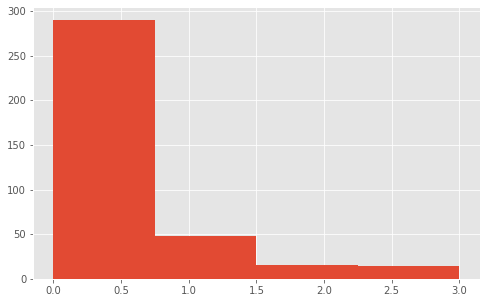

In [461]:
get_stats(numeric_columns[5])

In [462]:
#Пропущенные значения заменим на медиану
df['failures'].fillna(value=df['failures'].median(), inplace=True)

In [463]:
df.failures[df.failures >0].count()

77

В этой переменной все значения выше нуля ( а их 77) попадают в выброс. Сама переменная показывает слабую отрицательную корреляцию (-0,34) с баллами по экзамену. Для того, чтобы можно было использовать эту переменную для дальнейшего анализа, предлагаю **создать на ее основе новую номинальную переменную had_failures** ('no' - не было неудач, 'yes' - неудачи были).

In [464]:
df['had_failures'] = df.apply(lambda row: 'no' if row.failures == 0 else 'yes', axis = 1)

In [465]:
# добавляем в существующие списки колонок
col_df.loc['had_failures'] = 'были ли внеучебные неудачи'

In [466]:
object_columns.append(col_df.index[-1])

--- Статистика по переменной: famrel --- 

 семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 

Среднее: 3.93 
Медиана: 4.0 
Стандартное отклонение: 0.93 
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, 
IQR: 1.0,  Границы выбросов: [2.5, 6.5]. Размах: [-1.0, 5.0] 

Пропущенных значений: 27
Принимает значения:
  4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


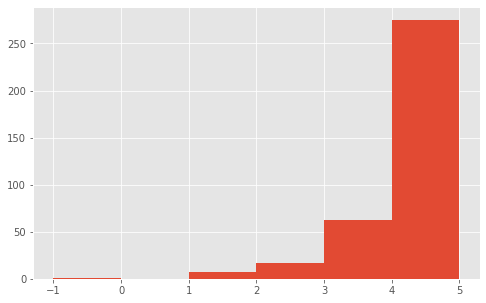

In [467]:
get_stats(numeric_columns[7])

Меняем выброс(-1), произошедший, скорее всего из-за ошибки ввода, на наиболее вероятное значение (1).

In [468]:
df.famrel.replace(-1,1, inplace = True)

--- Статистика по переменной: famrel --- 

 семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 

Среднее: 3.94 
Медиана: 4.0 
Стандартное отклонение: 0.91 
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, 
IQR: 1.0,  Границы выбросов: [2.5, 6.5]. Размах: [1.0, 5.0] 

Пропущенных значений: 27
Принимает значения:
 4.0    178
5.0     97
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64


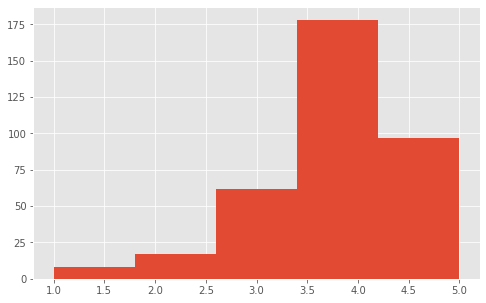

In [469]:
# посмотрим еще раз на статистику после удаления выброса
get_stats(numeric_columns[7])

Значения 1 и 2 попадают в выбросы, но я не вижу смысла их удалять или менять. Это возможные варианты ответа.  Кроме того, "очень плохо/хорошо" это субъективная оценка, так что сама переменная может быть неиформативной.  

Пропуски заполним медианой. 

In [470]:
df.famrel.fillna(value=df.famrel.median(), inplace=True)

--- Статистика по переменной: freetime --- 

 свободное время после школы (от 1 - очень мало до 5 - очень мого) 

Среднее: 3.22 
Медиана: 3.0 
Стандартное отклонение: 0.99 
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, 
IQR: 1.0,  Границы выбросов: [1.5, 5.5]. Размах: [1.0, 5.0] 

Пропущенных значений: 9
Принимает значения:
 3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: freetime, dtype: int64


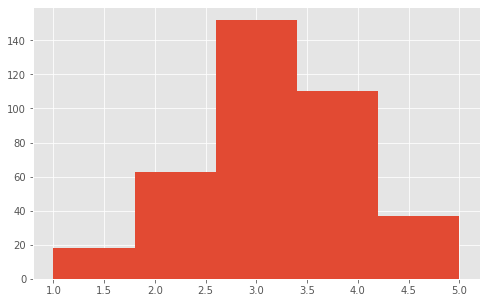

In [471]:
get_stats(numeric_columns[8])

Выбросы есть, но их довольно много. Приняла решение не выбрасывать. Кроме того, "очень мало\очень много", это субъективная оценка, переменная также может быть неинформативной. Так, например, во всех группах учеников по параметру "время на учебу помимо школы" медианная оценка свободного времени после школы одинаковая. 

In [472]:
df.groupby('studytime').freetime.median()

studytime
1.0    3.0
2.0    3.0
3.0    3.0
4.0    3.0
Name: freetime, dtype: float64

In [473]:
df.groupby('goout').freetime.median()

goout
1.0    3.0
2.0    3.0
3.0    3.0
4.0    4.0
5.0    4.0
Name: freetime, dtype: float64

У тех, кто ходит гулять с друзьями, свободного времени больше (или наоборот). Посмотрим на переменную goout, затем заполним пропуски. 

--- Статистика по переменной: goout --- 

 проведение времени с друзьями (от 1 - очень мало до 5 - очень много) 

Среднее: 3.09 
Медиана: 3.0 
Стандартное отклонение: 1.12 
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, 
IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. Размах: [1.0, 5.0] 

Пропущенных значений: 7
Принимает значения:
 3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64


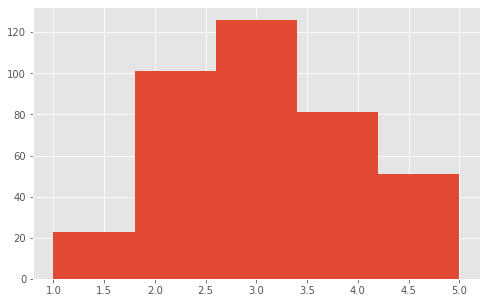

In [474]:
get_stats(numeric_columns[9])

In [475]:
# заполним пропуски медианой
df.goout.fillna(value=df.goout.median(), inplace=True)

In [476]:
# теперь заполним пропуски в переменной freetime
def fill_freetime(row):
    if pd.isnull(row.freetime):
        if row.goout <= 3:
            return 3
        else:
            return 4
    return row.freetime

In [477]:
df.freetime = df.apply(fill_freetime, axis = 1)

--- Статистика по переменной: health --- 

 текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) 

Среднее: 3.53 
Медиана: 4.0 
Стандартное отклонение: 1.4 
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, 
IQR: 2.0,  Границы выбросов: [0.0, 8.0]. Размах: [1.0, 5.0] 

Пропущенных значений: 15
Принимает значения:
 5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64


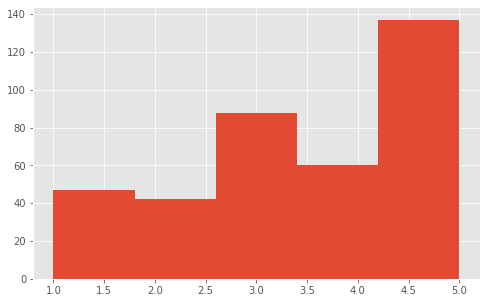

In [478]:
get_stats(numeric_columns[10])

Выбросов нет. Пропущенные значения заменяем медианой.

In [479]:
df.health.fillna(value=df.health.median(), inplace=True)

--- Статистика по переменной: absences --- 

 количество пропущенных занятий 

Среднее: 7.32 
Медиана: 4.0 
Стандартное отклонение: 23.62 
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, 
IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. Размах: [0.0, 385.0] 

Пропущенных значений: 11
Принимает значения:
 0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


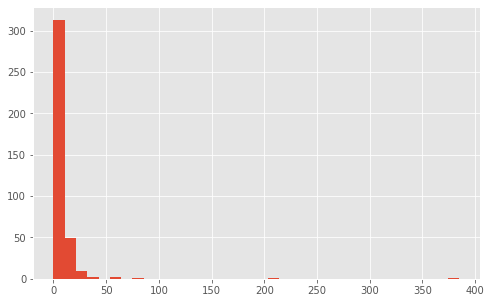

In [480]:
get_stats(numeric_columns[11])

In [481]:
# Заменим все пропуски на медиану
df.absences.fillna(value=df.absences.median(), inplace=True)

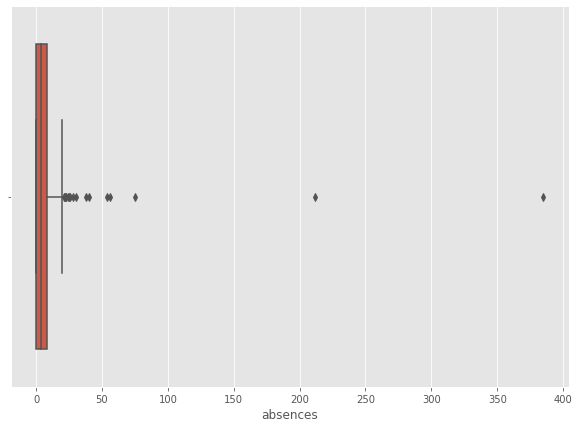

In [482]:
sns.boxplot(df.absences)

In [483]:
df.absences[df.absences> 30].count()

7

In [484]:
# ориентируясь на график, попробуем удалить все случаи отсутствия более 30 дней (7 самых крупных выбросов)
df = df[df.absences<30]

--- Статистика по переменной: absences --- 

 количество пропущенных занятий 

Среднее: 5.04 
Медиана: 4.0 
Стандартное отклонение: 5.67 
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, 
IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. Размах: [0.0, 28.0] 

Пропущенных значений: 0
Принимает значения:
 0.0     110
4.0      63
2.0      60
6.0      30
8.0      20
10.0     17
14.0     12
12.0     12
16.0      7
3.0       7
7.0       6
18.0      5
5.0       5
20.0      4
22.0      3
1.0       3
9.0       3
13.0      2
15.0      2
11.0      2
23.0      1
26.0      1
24.0      1
28.0      1
25.0      1
21.0      1
19.0      1
17.0      1
Name: absences, dtype: int64


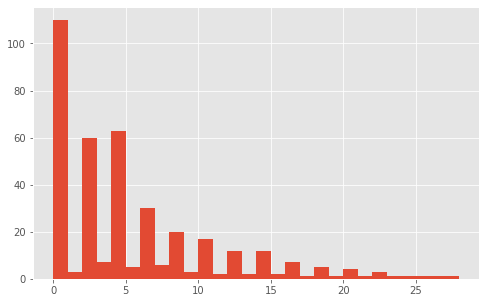

In [485]:
get_stats(numeric_columns[11])

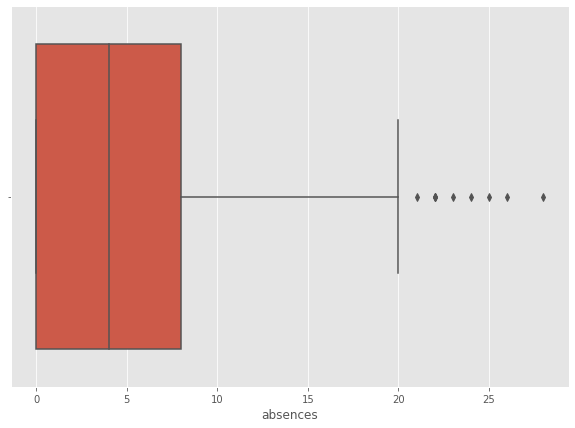

In [486]:
sns.boxplot(df.absences)

--- Статистика по переменной: score --- 

 баллы по госэкзамену по математике 

Среднее: 52.3 
Медиана: 55.0 
Стандартное отклонение: 23.07 
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, 
IQR: 30.0,  Границы выбросов: [-5.0, 115.0]. Размах: [0.0, 100.0] 

Пропущенных значений: 0
Принимает значения:
 50.0     54
55.0     44
0.0      37
75.0     33
65.0     31
60.0     31
40.0     28
70.0     27
45.0     25
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


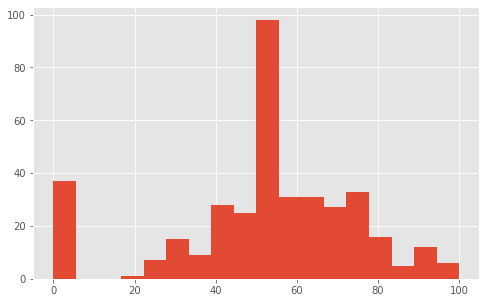

In [487]:
get_stats(numeric_columns[12])

Выбросов нет. Среднее и медиана близки. Распределение похоже на нормальное.

(12.0, 0.0)

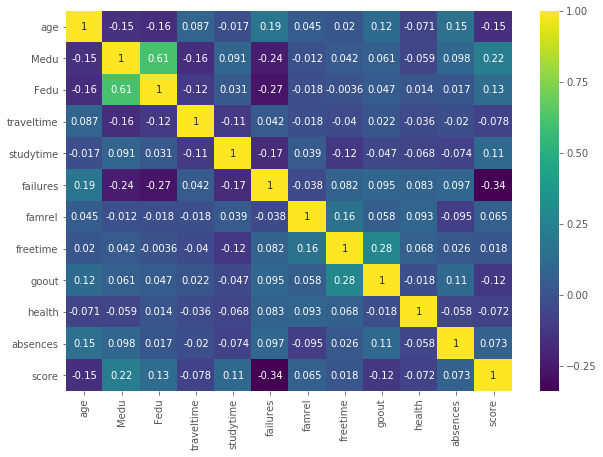

In [488]:
# посмотрим еще раз на корреляции количественных переменных
ax = sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

## Результаты анализа количественных переменных:
* Удалена переменная studytime,granular, тк она на 100% отрицательно коррелирует с переменной studytime. 
* Пропущенные значения заполнены (чаще всего, медианой) или удалены
* Выбросы удалены или заменены на близкие значения
* На основе переменной failures создана новая номинальная переменная had_failures
* После очистки данных обнаружена значимая положительная корреляция (0,61) между переменными "Образование матери" и "Образование отца"
* Значимых корреляций между количественными переменными и оценкой за экзамен не обнаружено
  


## Выводы после анализа количественных переменных:
* На основании имеющихся данных невозможно сделать вывод о взаимосвязи (или отсутствии взаимосвязи) между количественными переменными в нашем датасете и оценкой за экзамен
* Поскольку переменные "Образование матери" и "Образование отца" значимо коррелируют, для построения модели можно использовать какую-то одну из них. 


# Анализ номинальных переменных

In [489]:
def get_stats_object(col):
    ''' Функция для вывода описательной статистики и графиков по номинальным переменным'''
    
    mode = df[col].mode()
    missing = df[col].isna().sum()
    
    print('--- Статистика по переменной: {} ---'.format(col), '\n\n', col_df.loc[col][0], 
         '\n\nПропущенных значений: {}'.format(df[col].isna().sum()))
    print('Принимает значения:\n', df[col].value_counts())
    plt.figure(figsize=(8,5))
    sns.countplot(df[col])
    

--- Статистика по переменной: school --- 

 аббревиатура школы, в которой учится ученик 

Пропущенных значений: 0
Принимает значения:
 GP    337
MS     44
Name: school, dtype: int64


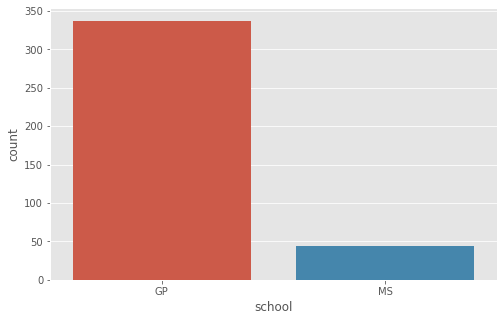

In [490]:
get_stats_object(object_columns[0])

--- Статистика по переменной: sex --- 

 пол ученика ( - женский, "M" - мужской) 

Пропущенных значений: 0
Принимает значения:
 F    199
M    182
Name: sex, dtype: int64


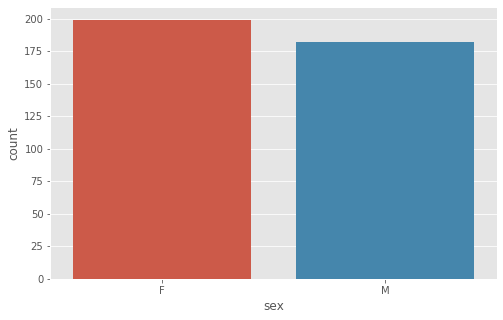

In [491]:
get_stats_object(object_columns[1])

--- Статистика по переменной: address --- 

 тип адреса ученика ("U" - городской, "R" - за городом) 

Пропущенных значений: 15
Принимает значения:
 U    285
R     81
Name: address, dtype: int64


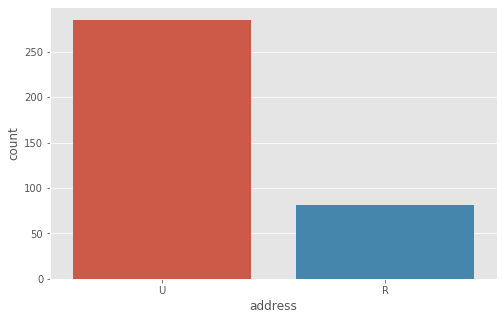

In [492]:
get_stats_object(object_columns[2])

In [493]:
df[df.address.isna()==True].traveltime.value_counts()

1.0    10
2.0     5
Name: traveltime, dtype: int64

In [494]:
# Заполняем пропуски модой
df.address.fillna(value=df.address.mode()[0], inplace=True)

--- Статистика по переменной: famsize --- 

 размер семьи("LE3" <= 3, "GT3" >3) 

Пропущенных значений: 26
Принимает значения:
 GT3    250
LE3    105
Name: famsize, dtype: int64


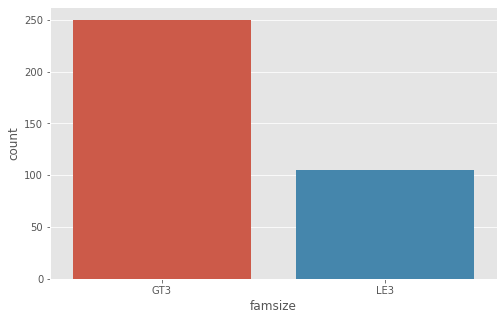

In [495]:
get_stats_object(object_columns[3])

In [496]:
df[df.famsize.isna()==True].Pstatus.value_counts()

T    20
A     2
Name: Pstatus, dtype: int64

In [497]:
# Заполняем пропуски модой
df.famsize.fillna(value=df.famsize.mode()[0], inplace=True)

--- Статистика по переменной: Pstatus --- 

 статус совместного жилья родителей ("T" - живут вместе "A" - раздельно) 

Пропущенных значений: 43
Принимает значения:
 T    305
A     33
Name: Pstatus, dtype: int64


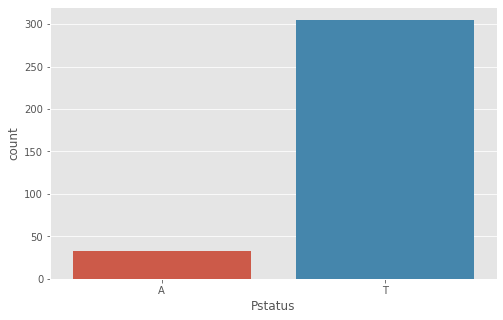

In [498]:
get_stats_object(object_columns[4])

In [499]:
df.groupby('famsize').Pstatus.value_counts()

famsize  Pstatus
GT3      T          224
         A           21
LE3      T           81
         A           12
Name: Pstatus, dtype: int64

In [500]:
# Заполняем пропуски модой
df.Pstatus.fillna(value=df.Pstatus.mode()[0], inplace=True)

--- Статистика по переменной: Mjob --- 

 работа матери ("teacher" - учитель, "health" - сфера здравоохранения, "services" - гос служба, "at_home" - не работает, "other" - другое) 

Пропущенных значений: 19
Принимает значения:
 other       123
services     95
at_home      58
teacher      54
health       32
Name: Mjob, dtype: int64


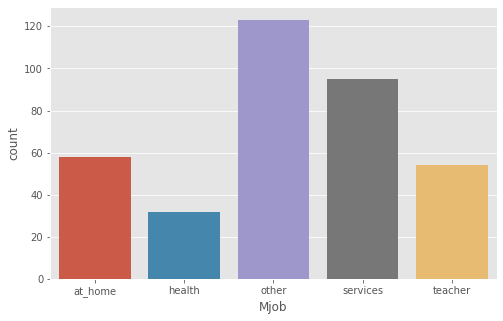

In [501]:
get_stats_object(object_columns[5])

In [502]:
#  все пропущенные значения отнесем в колонку other
df.Mjob.fillna('other', inplace=True)

--- Статистика по переменной: Fjob --- 

 работа отца ("teacher" - учитель, "health" - сфера здравоохранения, "services" - гос служба, "at_home" - не работает, "other" - другое) 

Пропущенных значений: 36
Принимает значения:
 other       191
services     95
teacher      28
at_home      16
health       15
Name: Fjob, dtype: int64


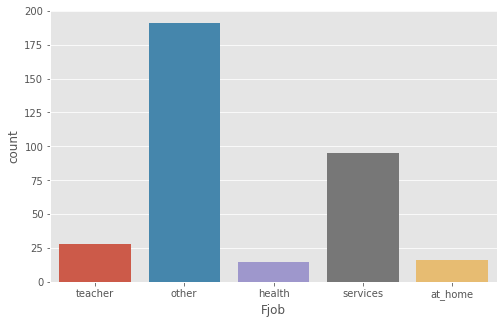

In [503]:
get_stats_object(object_columns[6])

In [504]:
#  все пропущенные значения отнесем в колонку other
df.Fjob.fillna('other', inplace=True)

--- Статистика по переменной: reason --- 

 причина выбора школы ("home" - близость к дому, "reputation" - репутация школы, "course" - образовательная программа, "other" - другое) 

Пропущенных значений: 17
Принимает значения:
 course        134
reputation     99
home           98
other          33
Name: reason, dtype: int64


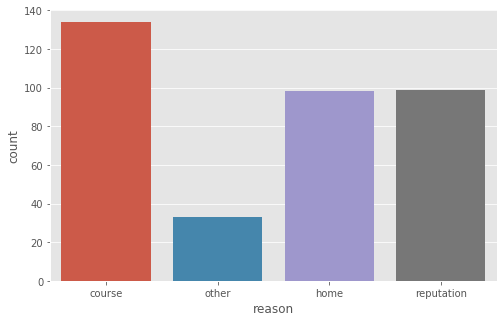

In [505]:
get_stats_object(object_columns[7])

In [506]:
#  все пропущенные значения отнесем в колонку other
df.Mjob.fillna('other', inplace=True)

--- Статистика по переменной: guardian --- 

 опекун ("mother" - мать, "father" - отец, "other" - другое) 

Пропущенных значений: 30
Принимает значения:
 mother    243
father     86
other      22
Name: guardian, dtype: int64


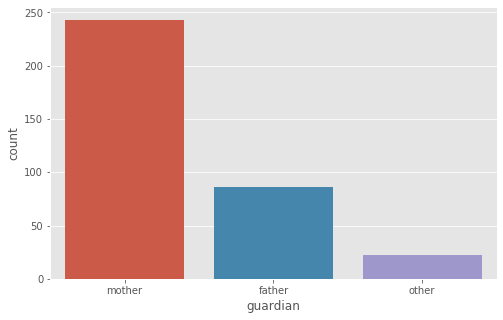

In [507]:
get_stats_object(object_columns[8])

In [508]:
df.groupby('guardian').Pstatus.value_counts()

guardian  Pstatus
father    T           82
          A            4
mother    T          218
          A           25
other     T           18
          A            4
Name: Pstatus, dtype: int64

In [509]:
df[df.guardian.isna()==True].Pstatus.value_counts()

T    30
Name: Pstatus, dtype: int64

С более высокой вероятностью опекун - это мать. Тем более, что для всех пропусков указано, что родители живут вместе. 
Заполним пропуски модой. И можно рассмотреть вариант того, чтобы эту переменную удалить из анализа, тк она не несет никакой ценной информации. 

In [510]:
df.guardian.fillna(value=df.guardian.mode()[0], inplace=True)

--- Статистика по переменной: schoolsup --- 

 дополнительная образовательная поддержка (yes или no) 

Пропущенных значений: 9
Принимает значения:
 no     325
yes     47
Name: schoolsup, dtype: int64


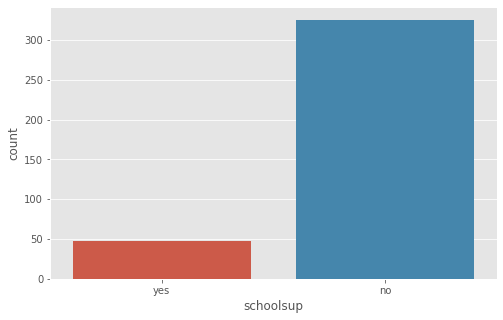

In [511]:
get_stats_object(object_columns[9])

In [512]:
#заполним пропуски модой
df.schoolsup.fillna(value=df.schoolsup.mode()[0], inplace=True)

--- Статистика по переменной: famsup --- 

 семейная образовательная поддержка (yes или no) 

Пропущенных значений: 36
Принимает значения:
 yes    212
no     133
Name: famsup, dtype: int64


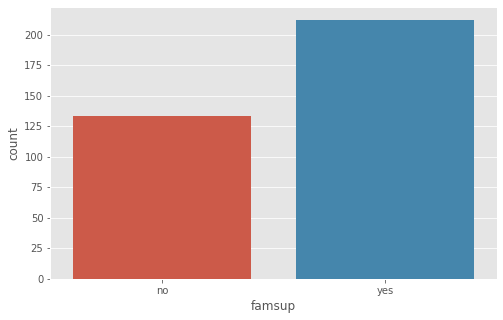

In [513]:
get_stats_object(object_columns[10])

In [514]:
#заполним пропуски модой
df.famsup.fillna(value=df.famsup.mode()[0], inplace=True)

--- Статистика по переменной: paid --- 

 дополнительные платные занятия по математике (yes или no) 

Пропущенных значений: 39
Принимает значения:
 no     193
yes    149
Name: paid, dtype: int64


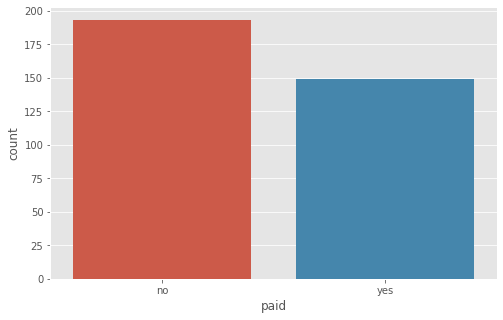

In [515]:
get_stats_object(object_columns[11])

In [516]:
#заполним пропуски модой
df.paid.fillna(value=df.paid.mode()[0], inplace=True)

--- Статистика по переменной: activities --- 

 дополнительные внеучебные занятия (yes или no) 

Пропущенных значений: 14
Принимает значения:
 yes    189
no     178
Name: activities, dtype: int64


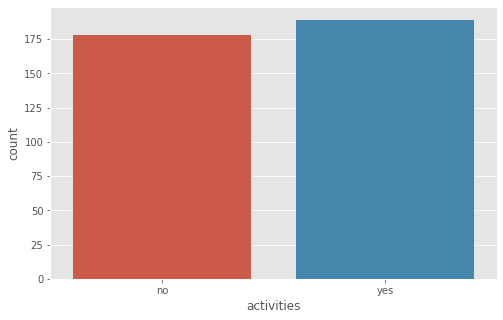

In [517]:
get_stats_object(object_columns[12])

In [518]:
# В этой переменной соотношение ответов примерно равное
# Заполним пропуски ближайшим значением, чтобы соблюсти пропорцию
df.activities.fillna(method='backfill', inplace=True)

--- Статистика по переменной: nursery --- 

 посещал детский сад (yes или no) 

Пропущенных значений: 15
Принимает значения:
 yes    290
no      76
Name: nursery, dtype: int64


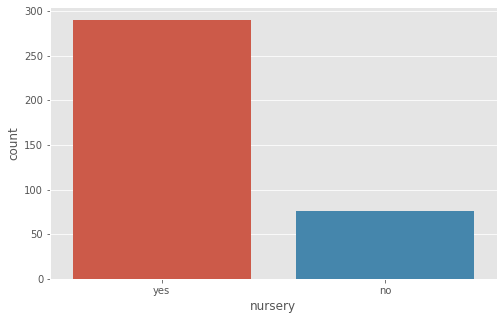

In [519]:
get_stats_object(object_columns[13])

In [520]:
#заполним пропуски модой
df.nursery.fillna(value=df.nursery.mode()[0], inplace=True)

--- Статистика по переменной: higher --- 

 хочет получить высшее образование (yes или no) 

Пропущенных значений: 20
Принимает значения:
 yes    343
no      18
Name: higher, dtype: int64


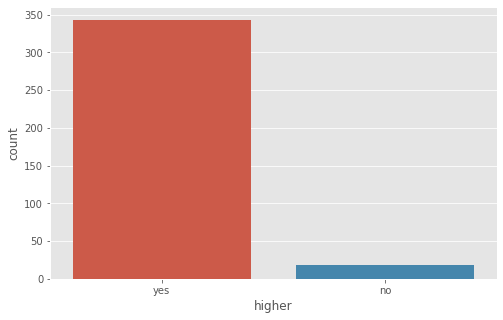

In [521]:
get_stats_object(object_columns[14])

In [522]:
#заполним пропуски модой
df.higher.fillna(value=df.higher.mode()[0], inplace=True)

--- Статистика по переменной: internet --- 

 наличие интернета дома (yes или no) 

Пропущенных значений: 34
Принимает значения:
 yes    293
no      54
Name: internet, dtype: int64


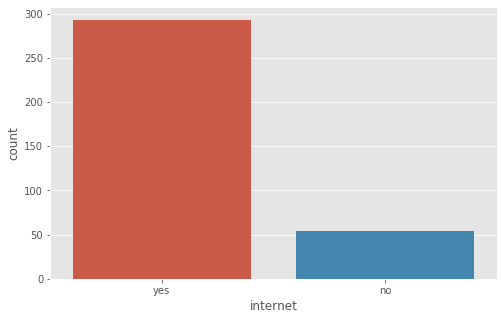

In [523]:
get_stats_object(object_columns[15])

In [524]:
#заполним пропуски модой
df.internet.fillna(value=df.internet.mode()[0], inplace=True)

--- Статистика по переменной: romantic --- 

 в романтических отношениях (yes или no) 

Пропущенных значений: 30
Принимает значения:
 no     232
yes    119
Name: romantic, dtype: int64


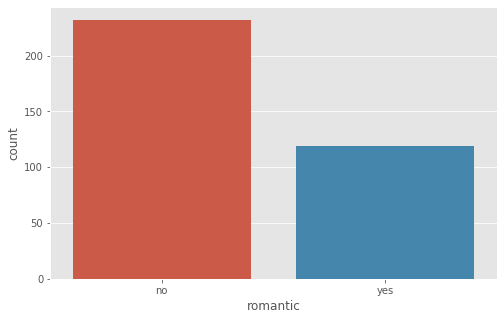

In [525]:
get_stats_object(object_columns[16])

In [526]:
#заполним пропуски модой
df.romantic.fillna(value=df.romantic.mode()[0], inplace=True)

--- Статистика по переменной: had_failures --- 

 были ли внеучебные неудачи 

Пропущенных значений: 0
Принимает значения:
 no     307
yes     74
Name: had_failures, dtype: int64


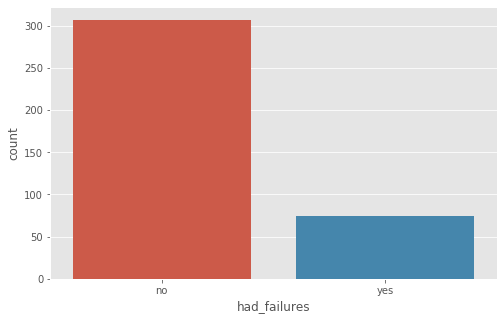

In [527]:
get_stats_object(object_columns[17])

Оценим взаимосвязь номинальных переменных с оценками по итоговому экзамену

In [528]:
def get_boxplot(column):
    """ Функция визуализирует распределение оценок за экзамен при разных значениях переменной (ящик с усами) """
    
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

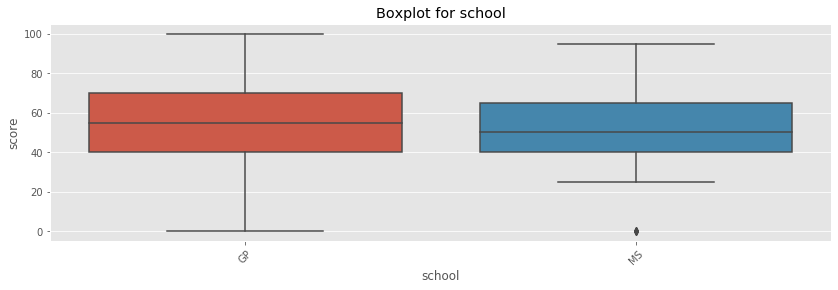

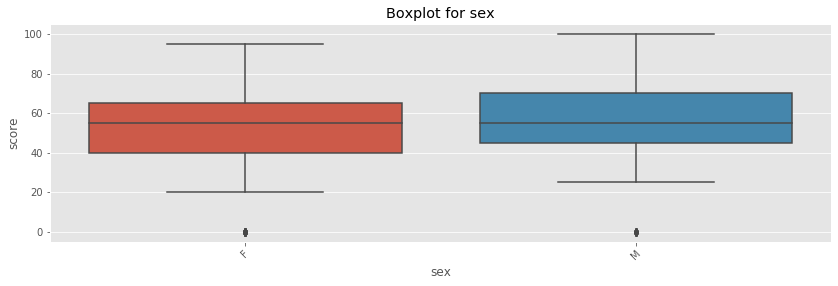

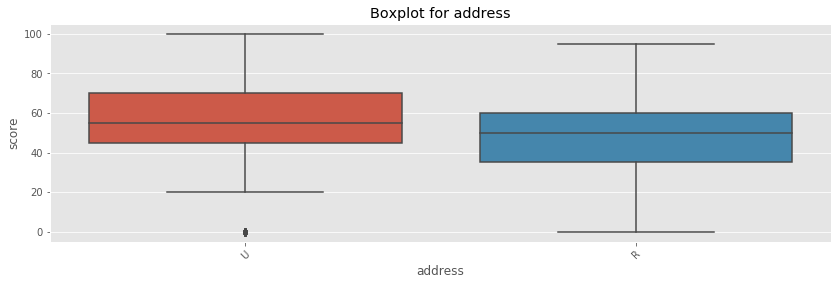

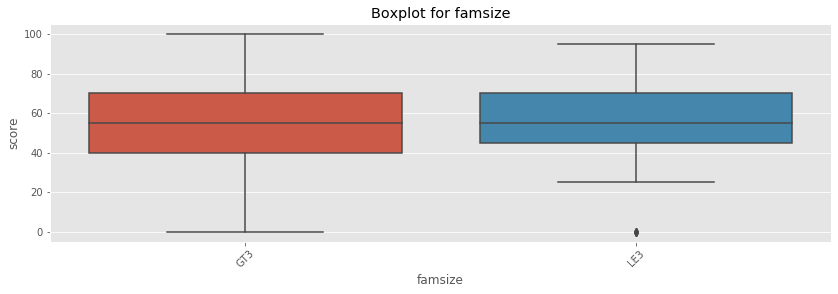

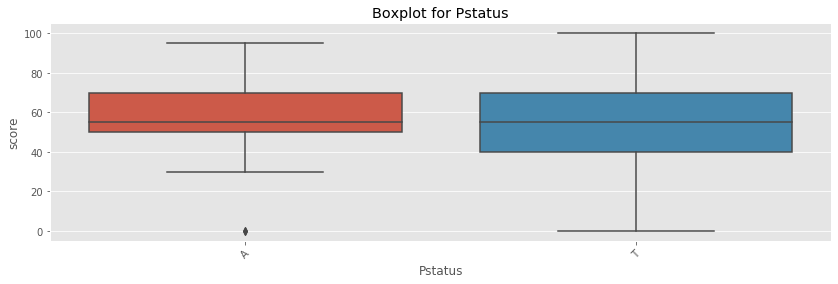

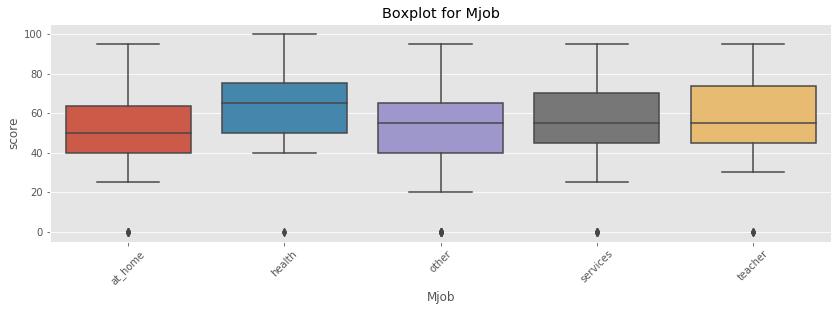

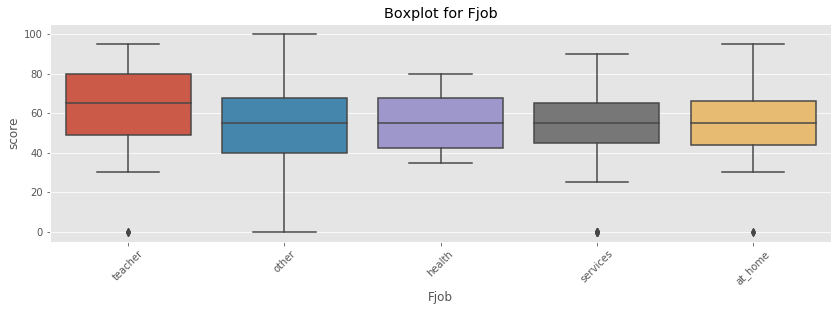

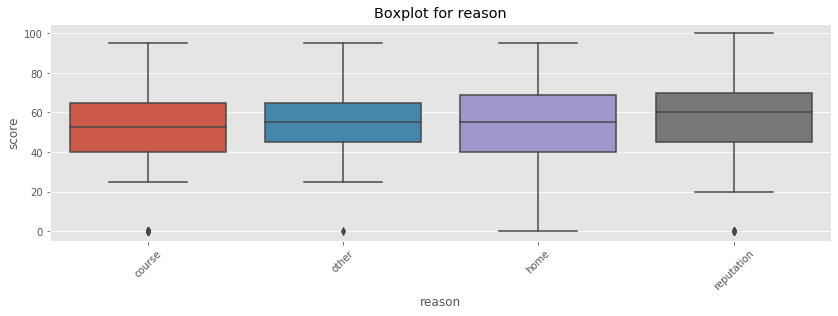

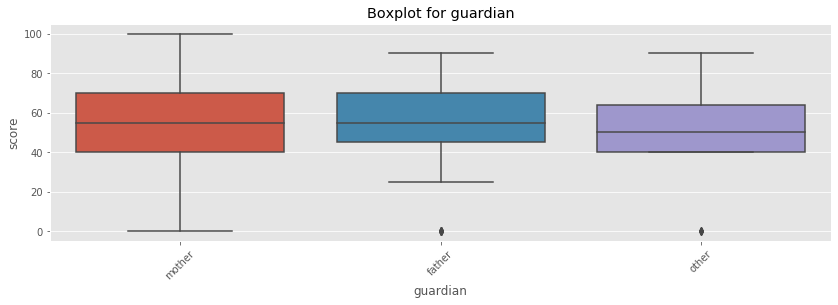

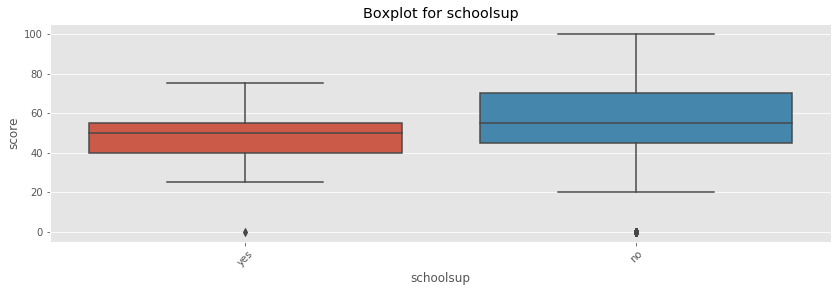

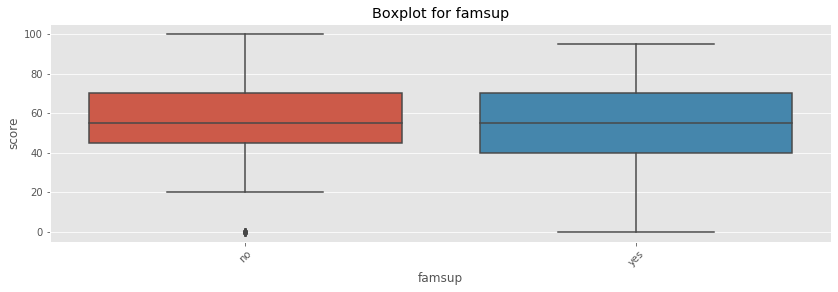

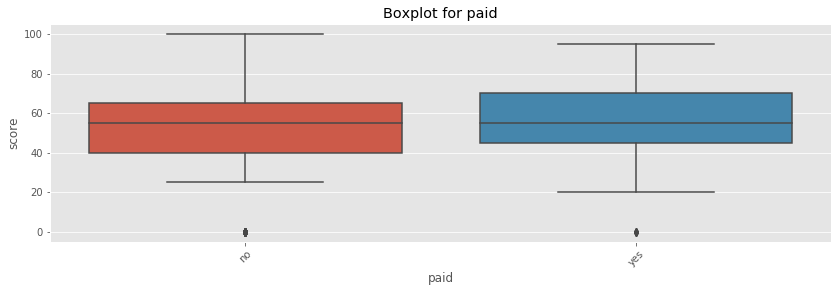

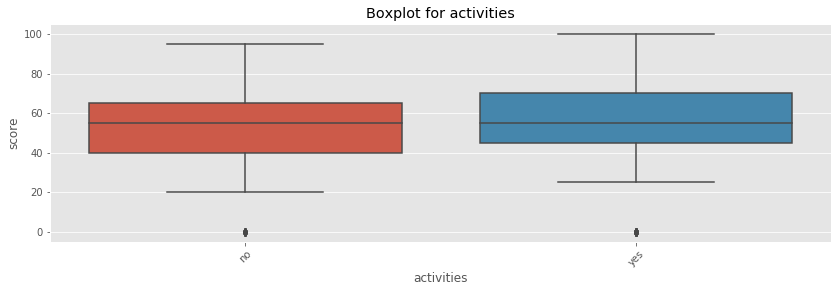

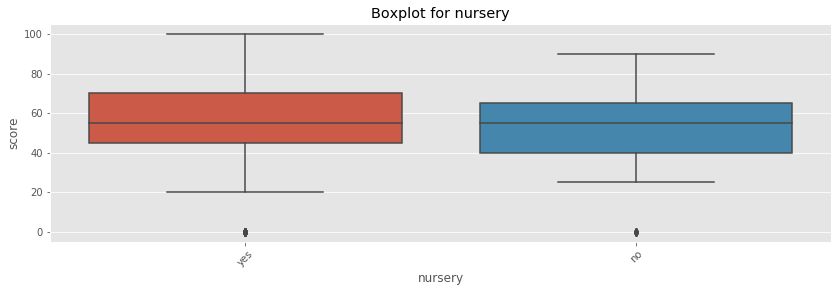

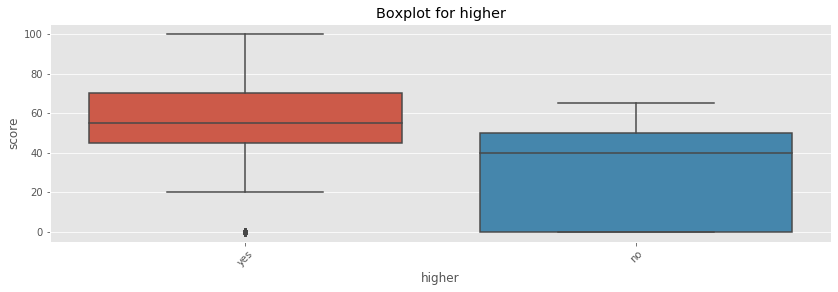

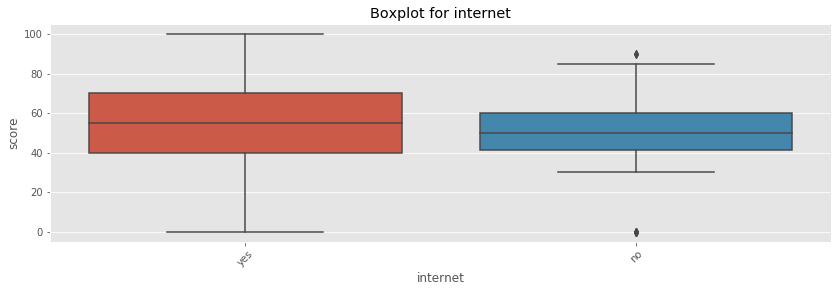

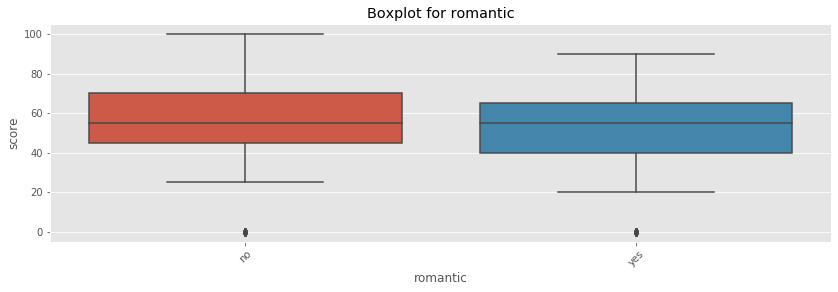

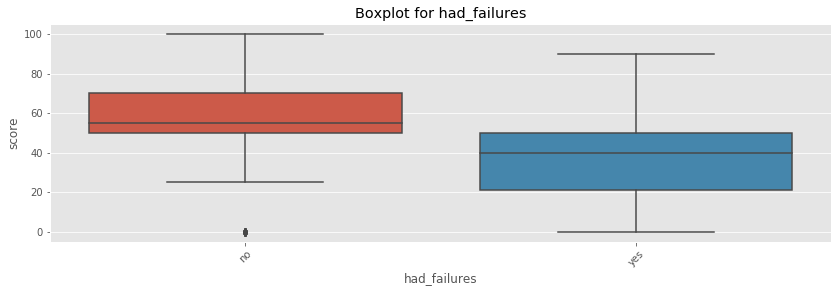

In [529]:
for col in object_columns:
    get_boxplot(col)

Оценим статистическую значимость влияния номинальных переменных на баллы по экзамену при помощи критерия Стьюдента. 

In [552]:
# при уровне значимости 0,05 
def get_stat_dif(column):
    cols = df[column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df[column] == comb[0], 'score'],
                        df.loc[df[column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [553]:
for col in object_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки had_failures


## Результаты анализа номинальных переменных:
* Пропущенные значения заполнены (чаще всего, медианой)
* Выявлено 8 переменных со статистически значимыми различиями в результатах экзамена при уровне значимости 0,05:
   * sex - юноши получали более высокий балл, чем девушки
   * address - ученики, проживающие в городе, получали более высокий балл по гос.экзамену по математике, чем ученики, проживающие за городом
   * Mjob - ученики, матери которых работали в сфере здравоохранения, получали более высокий балл
   * schoolsup - ученики, которые получали дополнительную образовательную поддержку в школе, сдавали экзамен хуже (скорее всего, дополнительные занятия школа обеспечивала отстающим ученикам)
   * paid - ученики, посещавшие дополнительные платные занятия по математике, справлялись на экзамене лучше. Возможно, этот критерий выделяет более обеспеченную группу учеников.
   * higher - ученики, которые собираются получать высшее образование, получали более высокий балл (м.б. тут обратная связь - двоечники трезво оценили свои возможности)
   * romantic - ученики, не состоящие в романтических отношениях, демонстрировали большую успешность на экзамене
   * had_failures - ученики, пережившие неудачи в жизни, получали более низкий балл

## Выводы после анализа номинальных переменных:
* Выявлено 8 переменных, связанных с различиями в результатах экзамена
* Я бы не стала пока делать выводы, что остальные переменные не влияют на оценку. Все-таки выборка небольшая, в ней было много пропусков. Возможно, при заполнении пропусков в данных появились искажения. 
* Исходя из здравого смысла, я бы исключила из анализа переменные school, guardian(опекун), reason(причина выбора школы) 


# Общие выводы


Качество данных в целом невысокое. Выборка небольшая, много пропущенных значений. Только 97 строк из 395 полностью заполнены. Есть неинформативные признаки.

На основании анализа имеющихся данных можно выделить 8 переменных для дальнейшего построения модели:
* sex
* address
* Mjob
* schoolsup 
* paid
* higher
* romantic
* had_failures